# Análisis de datos exploratorio: siniestros viales Argentina
En este notebook realizaremos las limpiezas adicionales que requieran nuestros datos para una correcta visualización y entendimiento de ellos. También exploraremos las relaciones y distribuciones interesantes para ver cuales serán las indicadas a exponer en el DashBoard.

# Importamos las librerías necesarias

In [2]:
import pandas as pd # Con pandas trabajaremos los datos.
import seaborn as sns # Graficamos y personalizamos gráficos con seaborn.
import matplotlib.pyplot as plt # Con matplotlib graficamos datos.
import folium # Trabajaremos mapas con folium.
from wordcloud import WordCloud # Haremos una nube de palabras como un gráfico para representar texto.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_39392\3363617675.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # Con pandas trabajaremos los datos.


# 1. Carga de datos y previsualización

In [3]:
df_h = pd.read_csv('../Data/Processed/homicidios_clean.csv', encoding='utf-8')
df_v = pd.read_csv('../Data/Processed/victimas_clean.csv')

Visualicemos los posibles errores en las variables numéricas. En este caso sólo nos fijaremos en el mínimo y máximo ya que estas variables no son variables para realizar un análisis descriptivo tal como algún cuartil, media, mediana, etc.  
Su mínimo y su máximo nos dirán si no están fuera de los límites conocidos para estas variables, por ejemplo sabemos que solo existen 12 meses, 24 horas, etc. La única variable que se excluye de lo mencionado es NVictimas, la cual sí puede ser descrita.

In [4]:
df_h.describe()

,NVictimas,Anio,Mes,Hora,Comuna,pos x,pos y
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,1.030349,2018.239757,6.682853,11.731411,7.371775,-58.440517,-34.619420
std,0.180311,1.679538,3.580748,6.649435,4.404666,0.045804,0.034775
min,1.000000,2016.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017.000000,4.000000,6.000000,4.000000,-58.474817,-34.642949
50%,1.000000,2018.000000,7.000000,11.000000,8.000000,-58.443621,-34.622603
75%,1.000000,2020.000000,10.000000,17.500000,11.000000,-58.400496,-34.596991
max,3.000000,2021.000000,12.000000,23.000000,15.000000,-58.356082,-34.534654


Podemos observar una distribución correcta en los límites de todas las variables, y una correcta desviación y distribución de la cantidad de víctimas, por lo que no será necesario la eliminación de outliers en este set. Sigamos con el set de víctimas.

In [5]:
df_v.describe()

,Edad
count,636.000000
mean,42.320755
std,19.875382
min,1.000000
25%,27.000000
50%,37.000000
75%,56.250000
max,95.000000


La distribución para edad también se ve bastante normal, su mínimo (1) tenemos que revisarlo para asegurarnos de que se trata de pasajeros como bebés a bordo de un auto, y no de conductores, cosa que implicaría un error.

In [6]:
df_v[df_v['Edad'] < 5]

,IdHecho,Rol,Sexo,Edad
139,2017-0013,peaton,M,4.0
217,2017-0112,pasajero_acompañante,M,1.0
365,2018-0103,peaton,M,1.0
574,2020-0071,peaton,M,4.0


Los casos de niños muy pequeños, en efecto están relacionados con pasajeros o peatones (bebés en coches).

---

No será necesario aplicar reducciones de outliers o de errores a estas columnas numéricas, las categóricas se revisaron previamente en el ETL, por lo que el set está listo para comenzar con el EDA.

# 2 Análisis homicidios

Empecemos contando las victimas y los accidentes.

In [7]:
print(f"Cantidad total de accidentes: {df_h.shape[0]}")
print(f"Cantidad total de victimas: {df_h.NVictimas.sum()}")

Cantidad total de accidentes: 659
Cantidad total de victimas: 679


Esto nos da a entender que un máximo de el **3%**(20 registros) de nuestros datos (659 registros), implican múltiples víctimas, esto puede ocurrir en roles de pasajero, especialmente en autobuses que siempre transportan estos, y ocasionalmente en automóviles, motos, hasta en peatones cuando transportan gente ya sea en coches o en sillas de ruedas.

## 2.1 Distribución de la cantidad accidentes

### 2.1.1 Por año

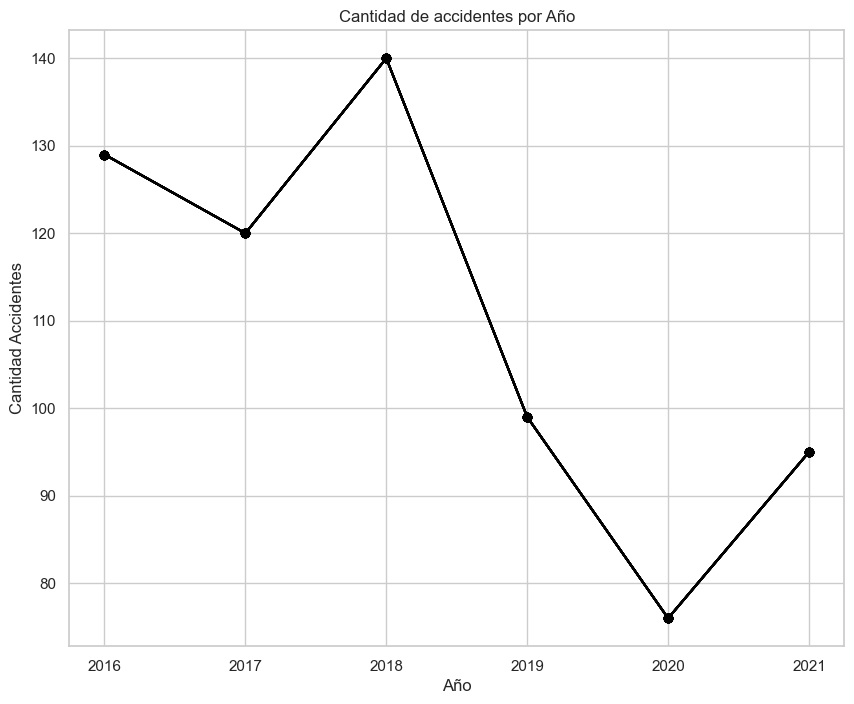

In [8]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 8))
# Para cada año único, contamos la cantidad de accidentes y personalizamos la línea.
plt.plot(df_h['Anio'].unique(), df_h.groupby('Anio').count(), marker='o', color='black')
# Describimos cada cosa.
plt.xlabel('Año')
plt.ylabel('Cantidad Accidentes')
plt.title('Cantidad de accidentes por Año')
# Mostramos el gráfico.
plt.show()

Empezando por el año 2016, la cantidad de accidentes superaba los 100, y en 2018 alcanzó el máximo con 140 accidentes, cosa que probablemente hizo saltar las alarmas para tomar medidas de prevención, altamente efectivas que deben ser estudiadas para ser re-aplicadas de una mejor manera que se adapte a los años actuales, para así poder disminuir la cantidad en el aumento que hubo en 2021, y continuar, aunque en el año actual con los carros inteligentes llegando a nuestras vidas y con cada vez más IOT (Internet de las cosas), todo esto puede variar fuerte mente y se necesitarán tomar medidas preventivas (tales como simulaciones realistas con estos nuevos vehículos) si no queremos que los indicadores de que algo está mal, sean altos números en los siniestros viales. El objetivo de estos avances tecnológicos no solo es ahorrarnos tiempo, sino aprovechar su exactitud para reducir los errores (en este caso accidentes) lo más cercano a 0 posible, y así lo lograrán en un futuro, pero debemos procurar que sus datos de entrenamiento, no sean nuestras vidas.

### 2.1.2 Por mes

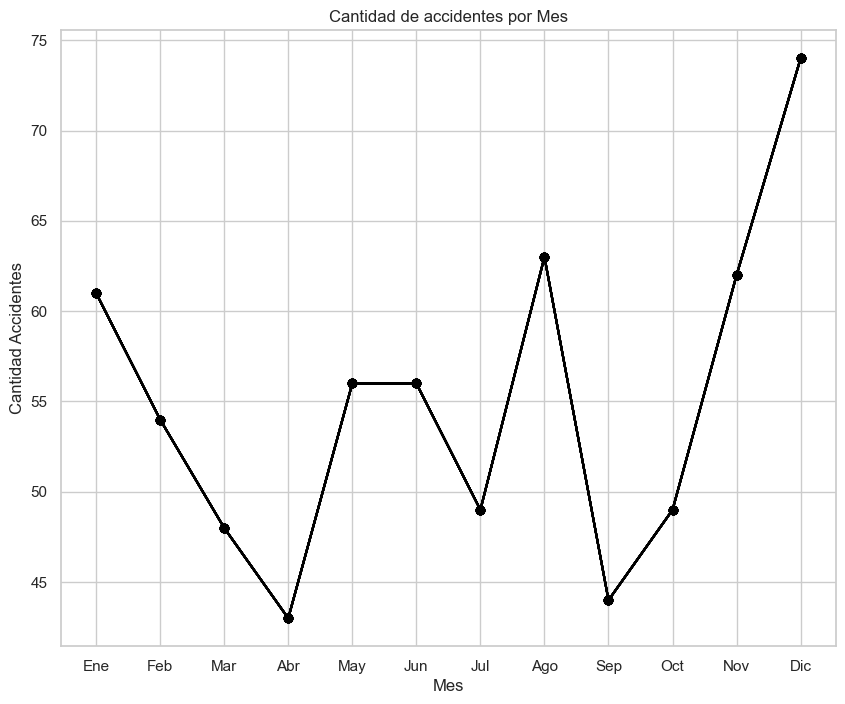

In [9]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 8))
# Para cada año único, contamos la cantidad de accidentes y personalizamos la línea.
plt.plot(df_h['Mes'].unique(), df_h.groupby('Mes').count(), marker='o', color='black')
# Renombramos los meses para una mejor visualización.
plt.xticks(df_h['Mes'].unique(), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
# Describimos cada cosa.
plt.xlabel('Mes')
plt.ylabel('Cantidad Accidentes')
plt.title('Cantidad de accidentes por Mes')
# Mostramos el gráfico.
plt.show()

Las fechas que más accidentes registran son Diciembre, disminuyendo lentamente a Enero, hasta caer a su mínimo el més de Abril, nuevamente variando en su promedio. Esto es de esperarse, debido a que estos meses marcan el comienzo de las épocas navideñas, junto con las vacaciones, siendo noviembre el inicio de esto y Febrero el final, meses en los cuales evidenciamos, más accidentes, porque hay más viajes.  
El gobierno debe tomar medidas adicionales estas fechas, tales como la identificación de los lugares comunes en los que ocurren accidentes durante estas fechas, para así establecer controles adicionales que identifiquen mejor situaciones comunes de dichas fechas, tales como conductores ebrios, congestiones, etc.

### 2.1.3 Por hora

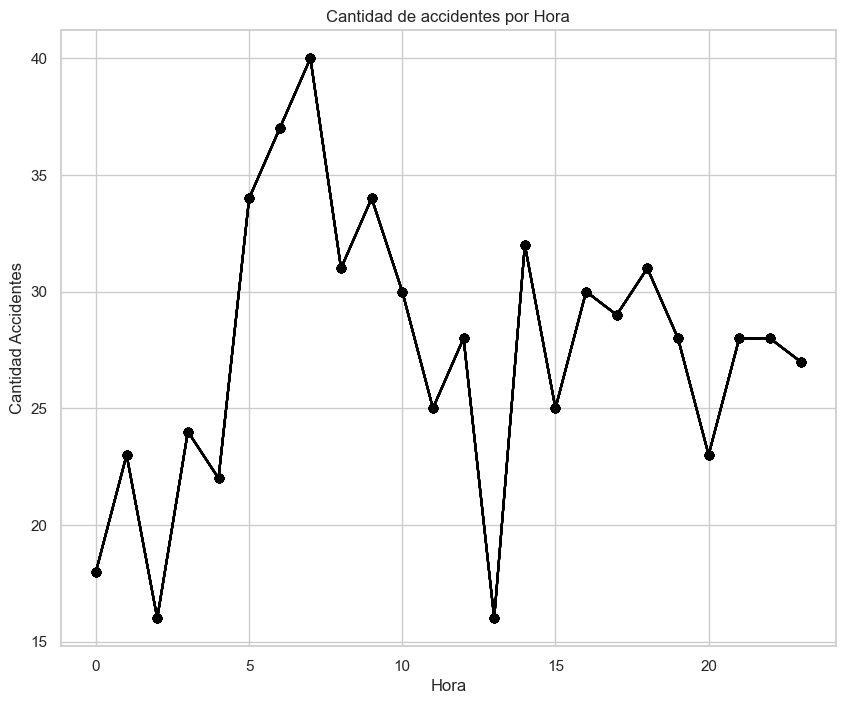

In [10]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 8))
# Para cada año único, contamos la cantidad de accidentes y personalizamos la línea.
plt.plot(sorted(df_h['Hora'].unique()), df_h.groupby('Hora').count(), marker='o', color='black')
# Describimos cada cosa.
plt.xlabel('Hora')
plt.ylabel('Cantidad Accidentes')
plt.title('Cantidad de accidentes por Hora')
# Mostramos el gráfico.
plt.show()

La hora en la que más accidentes se producen es las **7 am**, empezando a crecer desde las **4 am**, dichas horas son en las que la mayoría de personas empiezan su rutina diaria, ya sea llevando a sus hijos a la escuela o yendo a trabajar, el problema con estas horas altas son:  
- Posible falta de concentración de las personas, ya sea por estar recién despiertas o por tener una mala calidad del sueño, esto se evidencia especialmente en que en las horas en las que termina la jornada para la mayoría de personas, no es tan alta la cantidad de siniestros.  
- El clima a esas horas y en temporadas de frío suele ocasionar neblinas, e incomodidad por el mismo clima, lo que puede ocasionar accidentes.  
- Las personas usualmente van con afán a sus destinos, ya que no suelen ser muy puntuales y esto les puede a su vez, ocasionar estrés, que afecta aún más en las probabilidades de estar involucrados en un accidente, al salir del trabajo, no hay tanto afán ya que no hay un horario estricto para volver a casa.  

Todos estos factores se pueden mejorar, haciendo que dichas horas disminuyan drásticamente en su cantidad de siniestros. Mis respectivas soluciones a dichos problemas son:  
- Promover los buenos hábitos que favorezcan un descanso efectivo, y los hábitos matutinos que favorezcan a un mejor desarrollo al despertar y así iniciar la jornada con una mejor cantidad de energía para invertir en su seguridad vial.  
- Instalar medidas preventivas que funcionen a horas necesarias y especialmente en presencia de climas que favorezcan la aparición de impedimentos para conducir de forma segura.  
- Incentivar la puntualidad y hacer entender que aunque dicha puntualidad no se pueda alcanzar siempre, es mejor llegar tarde a un destino que nunca llegar.

## 2.2 Distribución y relación variables categóricas

### 2.2.1 Acusados vs Víctimas

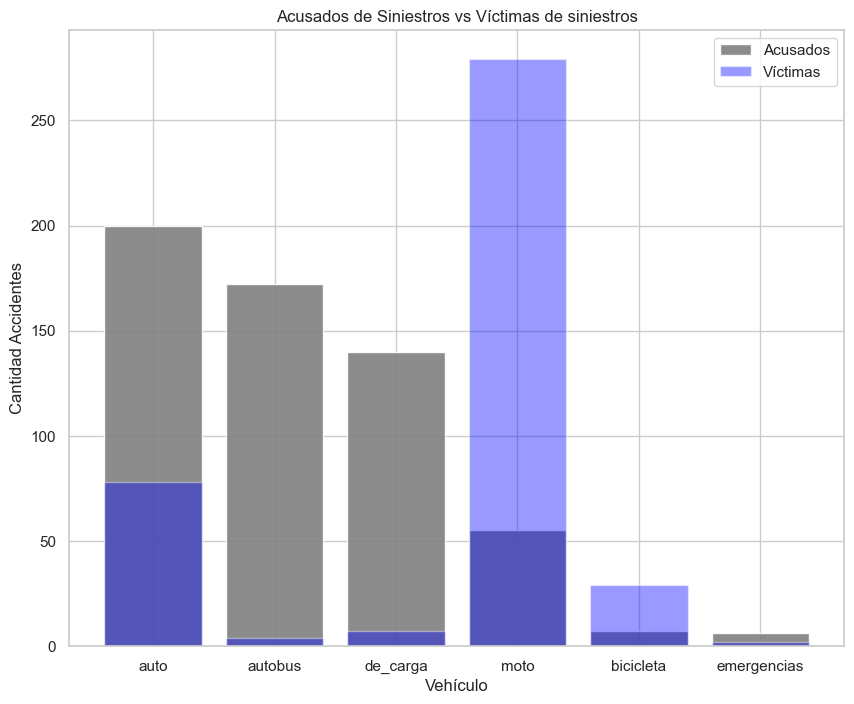

In [11]:
acusados = df_h['Acusado'].value_counts().drop(['tren', 'multiple', 'objeto fijo']) # Contamos los acusados, excluyendo sus exclusivos.
victimas = df_h['Victima'].value_counts().drop(['peaton', 'objeto fijo']) # Contamos las victimas, excluyendo su exclusivo (peatones), ya que un peatón no puede atropellar algo. Aún... Objeto fijo lo sacamos ya que no suele ser una victima.
plt.figure(figsize=(10, 8)) # Creamos la figura.
plt.bar(acusados.index, acusados, edgecolor='white', alpha=0.9, color='gray', label='Acusados') # Creamos cada barra con transparencia para observar los valores en otra.
plt.bar(victimas.index, victimas, edgecolor='white', alpha=0.4, color='blue', label='Víctimas')
plt.xlabel('Vehículo')
plt.ylabel('Cantidad Accidentes')
plt.title('Acusados de Siniestros vs Víctimas de siniestros')
plt.legend() # Mostramos la leyenda.
plt.show() # Mostramos el gráfico.

Los **acusados de provocar un accidente** cuando son **vehículos de carga** o **autobuses**, lo son en su gran mayoría (más del **90%** de las veces que cuando son **víctimas**), esto debido a que estos vehículos, normalmente grandes y robustos, cuando chocan con una moto o un carro, que es lo común, no recibirán muchos daños, mientras que la víctima de dicho choque, sí que los sufrirá por la diferencia de magnitud de los vehículos. Esto lo corroboramos en la observación de la columna **Moto**, en la cual, casi el **80%** de las veces son **Victimas**, debido a que la manera en la que podrían causar daño alguno que no fuese a ellos mismos, sería arrollando a un peatón o a una bicicleta, o haciendo perder el control a algún vehículo más grande, situación en la cual igualmente, acabaría lastimado el motociclista. La columna **Auto** es la más equilibrada, siendo este capaz de provocar como de sufrir accidentes por igual medida.  

Todo esto se da debido a que los conductores, en su mayoría, no logran comprender varios factores, entre ellos, los **conductores de vehículos medianos o grandes**, deben tener la suficiente **prudencia**, para ser **conscientes del daño que pueden causar a otros**. Mientras que los conductores de vehículos pequeños y peatones, deben ser **cautelosos**, tanto de **estar al tanto de el daño que pueden sufrir como de no provocar a los conductores** mencionados previamente, debido a que **solo ocasionarán un conflicto, el cual no tiene ganadores**.

## 2.2.3 Relación Victima-Acusado

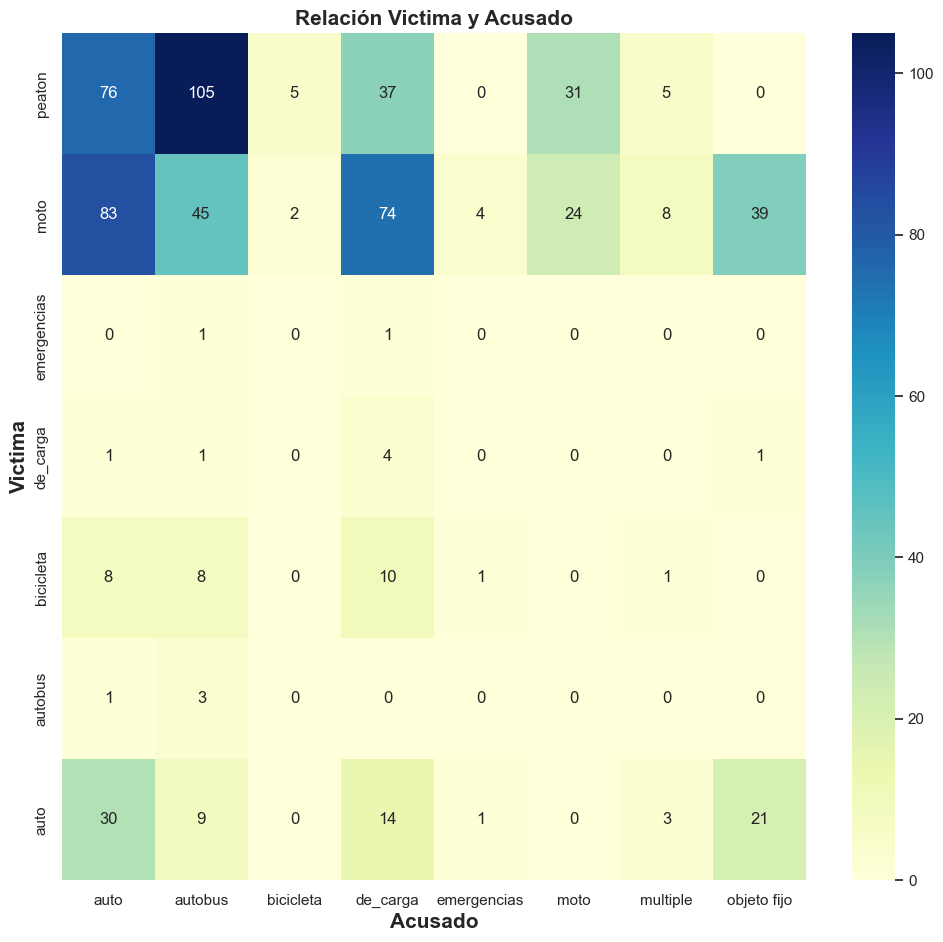

In [12]:
# Creamos una tabla que nos indique la frecuencia de las dos columnas a evaluar. Exceptuando Objetos victimas, y Acusados trenes, para una mejor visualización.
cross = pd.crosstab(df_h['Victima'][df_h['Victima']!='objeto fijo'], df_h['Acusado'][df_h['Acusado']!='tren'])
# Invertimos la tabla para que sea fácil buscar las relaciones de las variables en el gráfico.
cross = cross[::-1]
# Creamos la figura.
plt.figure(figsize=(12, 11))
sns.heatmap(cross, annot=True, cmap="YlGnBu", fmt='g')
# Nombramos cada cosa.
plt.title('Relación Victima y Acusado', fontweight='bold', size=15)
plt.xlabel('Acusado', fontweight='bold', size=15)
plt.ylabel('Victima', fontweight='bold', size=15)
plt.show()

Los **peatones** junto con las **motocicletas** mantienen la mayor cantidad de victimas en accidentes, siendo los **autos**, **vehículos de carga** y **solo para las motos objetos fijos**, las principales amenazas de ellos en la carretera. Esto debido a la magnitud del impacto como expliqué previamente en el *punto 2.2 Distribución Acusados de siniestros vs Víctimas de siniestros*. Por otra parte los **autos** mantienen una extensa participación debido a que son propensos tanto a provocar como a sufrir accidentes fatales, al ser de un tamaño equilibrado para ambas situaciones.

## 2.3 Distribución de accidentes por ubicación geográfica

### 2.3.1 Mapa de cantidad de accidentes por ubicación geográfica, separado por comunas

In [13]:
# Creamos un DataFrame con los valores redondeados para una mejor visualización.
df_t = pd.DataFrame()
df_t['pos x'] = df_h['pos x'].apply(lambda x: round(x, 3))
df_t['pos y'] = df_h['pos y'].apply(lambda x: round(x, 3))
# Calculamos la frecuencia de cada ubicación.
frecuencia_ubicaciones = df_t.groupby(['pos x', 'pos y']).size().reset_index(name='frecuencia')
# Ordenamos el set de datos.
frecuencia_ubicaciones = frecuencia_ubicaciones.sort_values(by='frecuencia', ascending=False)
# Creamos un mapa, con la ubicación inicial en la media de nuestras frecuencias. Si tiene problemas al visualizar modifique el parámetro min_zoom a un valor menor.
mapa = folium.Map(location=[frecuencia_ubicaciones['pos y'].mean(), frecuencia_ubicaciones['pos x'].mean()], zoom_start=12, min_zoom=12)
# Cargamos los datos de los límites de las comunas.
comunas_geojson = "../assets/comunas.geojson"
# Con GeoJson agregamos los límites con un identificador al hacer hover.
folium.GeoJson(
    comunas_geojson,
    name='Comunas',
    style_function=lambda feature: {
        'color': 'black',
        'opacity': 0.6,
        'fillOpacity': 0.15,
        'fill_color':'gray',
        'weight': 2
    },
    highlight_function=lambda x: {'weight': 3},
    tooltip=folium.features.GeoJsonTooltip(fields=['COMUNAS'], aliases=['Comuna:'])).add_to(mapa)
# Agregamos las apariciones de accidentes al mapa.
for index, row in frecuencia_ubicaciones.iterrows():
    folium.Circle(
        location=[row['pos y'], row['pos x']],
        radius=row['frecuencia'] * 100,
        color='red',
        fill=True,
        fill_color='orange',
        fill_opacity=0.4,
        opacity=0.4
    ).add_to(mapa)
#
display(mapa)

Podemos observar que las primeras comunas, de la 1 a la 4, es donde se concentra la mayor parte de los siniestros, sin embargo, están bastante distribuidos al rededor de todo el mapa, desde sus interiores hasta sus límites.

### 2.3.2 Distribución de accidentes por Tipo de Calle

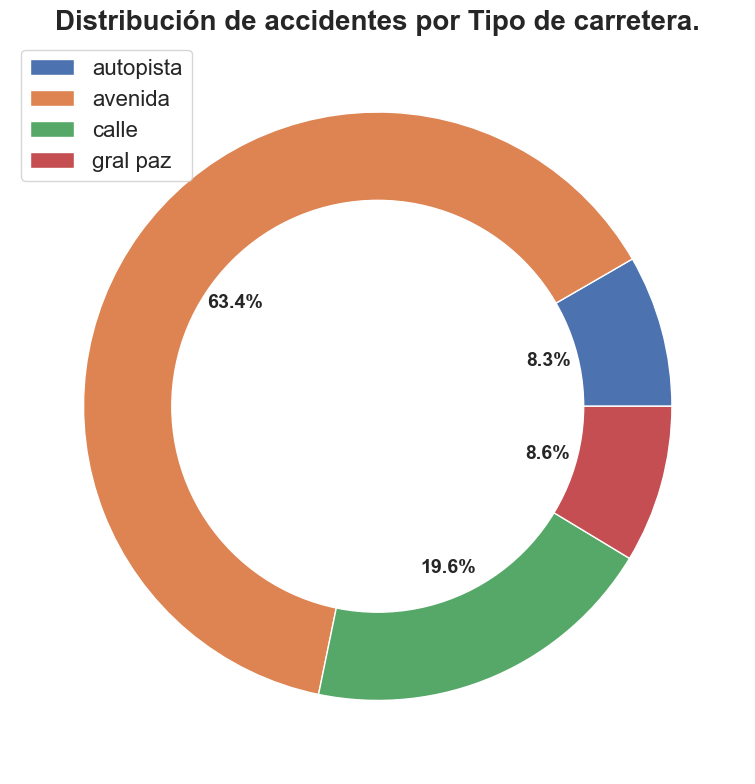

In [14]:
# Agrupamos los datos.
dat = df_h.groupby('TipoCalle').size()
# Creamos la figura y el gráfico de pastel.
plt.figure(figsize=(10, 8))
plt.pie(dat.values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight':'bold'})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# Nombramos cada elemento.
plt.title('Distribución de accidentes por Tipo de carretera.', size=20, fontweight='bold')
plt.legend(dat.index, fontsize=16)
plt.tight_layout()
plt.show()

Las avenidas son las más implicadas en accidentes, a pesar de que las autopistas son las carreteras con más velocidad y congestion en fechas importantes, las avenidas siguen siendo en las que es más probable que ocurra un siniestro vial, debido a que son las que cotidianamente se utilizan en el día a día.  
Cabe aclarar que la variable gral paz es una avenida, la cual cubre gran parte del límite de la ciudad de Buenos Aires, por lo que dicha variable entra dentro de la categoría de autopista, pero al ser una tan importante, tiene su propia categoría y pronto veremos qué tantos accidentes implica en comparación a las demás carreteras.

### 2.3.3 Distribución de accidentes por nombre de calle.

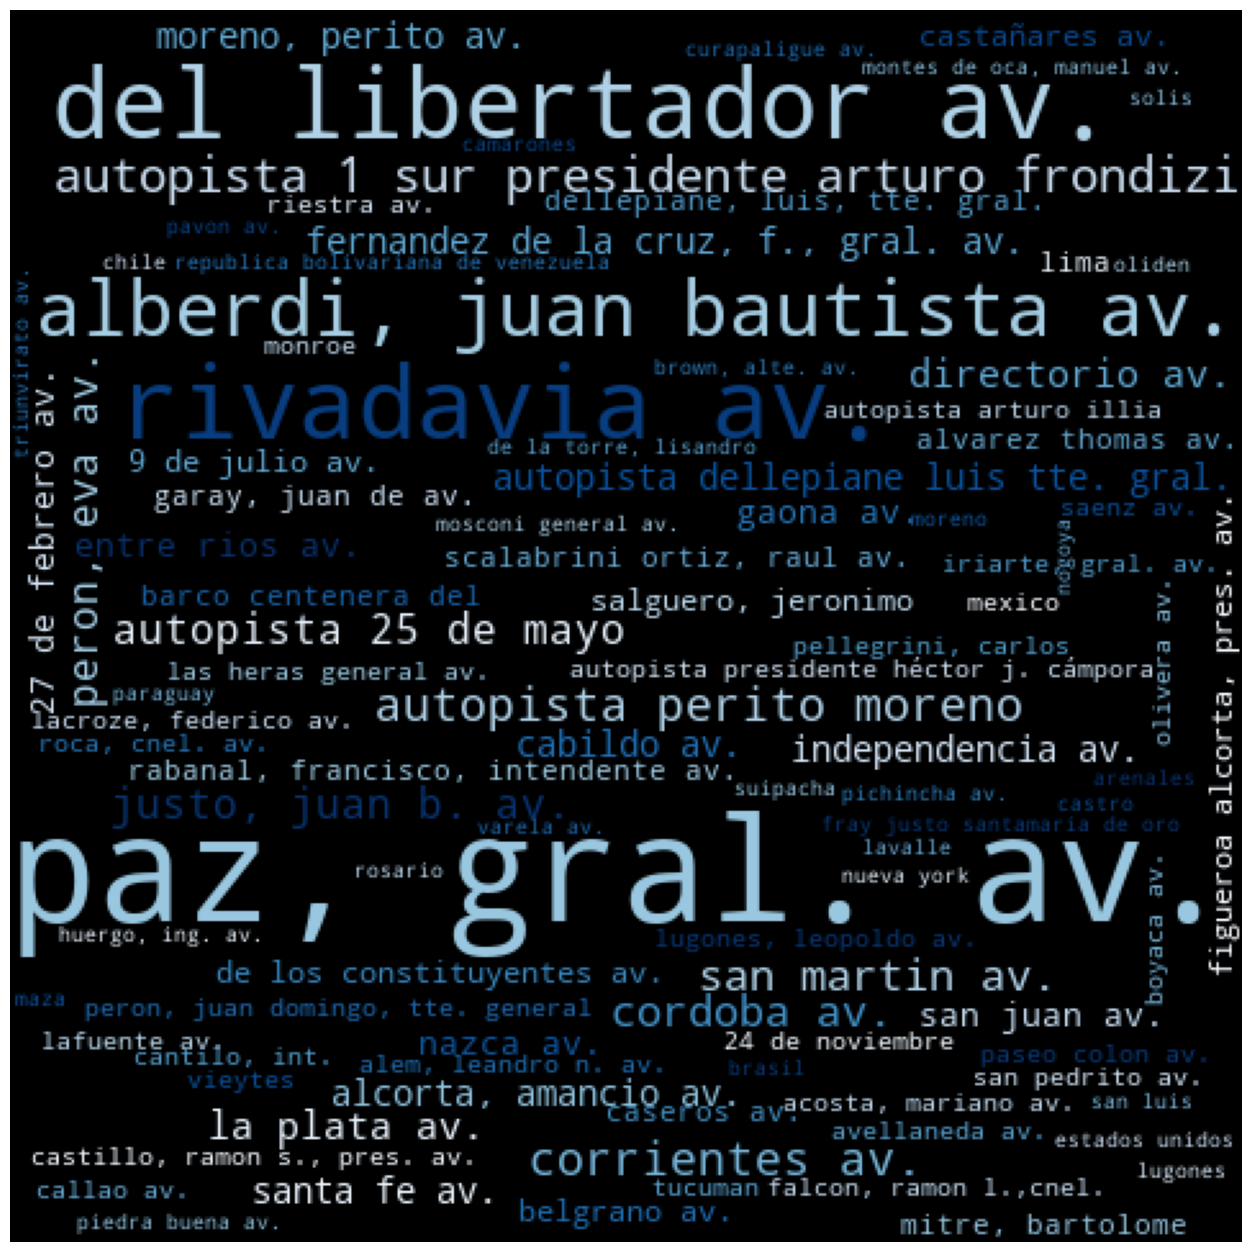

In [45]:
# Guardamos las calles.
words = df_h['Calle'].tolist()
# Creamos un diccionario que registre la frecuencia de aparición de la palabra.
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
# Generamos nuestro wordCloud en base a dicha aparición.
wc = WordCloud(width=480, height=480, margin=0, min_font_size=2, max_font_size=100, max_words=100, colormap='Blues')
wc.generate_from_frequencies(word_freq)
# Mostramos el gráfico.
plt.figure(figsize=(16, 16))
plt.imshow(wc)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


La calle que más destaca, como era de esperarse al tener hasta su propia categoría y al ser tan importante para movilizarse por los al rededores de la ciudad de Buenos Aires, es la avenida General Páz. seguida de las más grandes avenidas que podemos apreciar, tales como del libertador, Alberdi Juan Bautista, y Rivadavia.

# 3. Conclusión

Pudimos visualizar que los datos se comportan de la manera esperada, tanto en la distribución de los accidentes hacia ciertas fechas, horas, o situaciones, como en la relación que poseen las variables, esto nos deja en un ambiente en el cual será un poco más fácil aplicar una solución al problema, y con más posibilidad de reducir la cantidad de accidentes, debido a que los datos, siendo predecibles y normales, también lo serán los accidentes, y al momento de implementar medidas de seguridad, seremos capaces de prevenir estos, mucho antes de que ocurran, o de estar listos en zonas estratégicas para cuando lleguen a ocurrir.